# Laboratorio No. 3 - Modelacion y Simulacion

### 2.2 Depredador - Presa

Manuel Rodas - 21509 / Jose Santisteban - 21153 / Sebastian Solorzano - 21826

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Modelo

In [2]:
def model(t, y, params):
    R, P = y
    alpha, beta, delta, gamma = params
    dRdt = alpha * R - beta * R * P
    dPdt = delta * R * P - gamma * P
    return np.array([dRdt, dPdt])

### Runge-Kutta 4to orden

In [3]:
def runge_kutta_4(f, t0, y0, t_end, h, params):
    t = np.arange(t0, t_end + h, h)
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    
    for i in range(1, n):
        k1 = h * f(t[i-1], y[i-1], params)
        k2 = h * f(t[i-1] + 0.5*h, y[i-1] + 0.5*k1, params)
        k3 = h * f(t[i-1] + 0.5*h, y[i-1] + 0.5*k2, params)
        k4 = h * f(t[i-1] + h, y[i-1] + k3, params)
        
        y[i] = y[i-1] + (k1 + 2*k2 + 2*k3 + k4) / 6
    
    return t, y

### Parámetros

In [6]:
R0 = 40
P0 = 9
alpha = 0.1
beta = 0.02
delta = 0.01
gamma = 0.1
h = 0.1
T = 50

params = [alpha, beta, delta, gamma]
y0 = [R0, P0]

### Solución de la ecuación

In [7]:
t, y = runge_kutta_4(model, 0, y0, T, h, params)

### Resultados

In [8]:
print(f"Población estimada de presas en T = 50: {y[-1, 0]:.2f}")
print(f"Población estimada de depredadores en T = 50: {y[-1, 1]:.2f}")

Población estimada de presas en T = 50: 3.07
Población estimada de depredadores en T = 50: 0.54


### Gráfica de los resultados

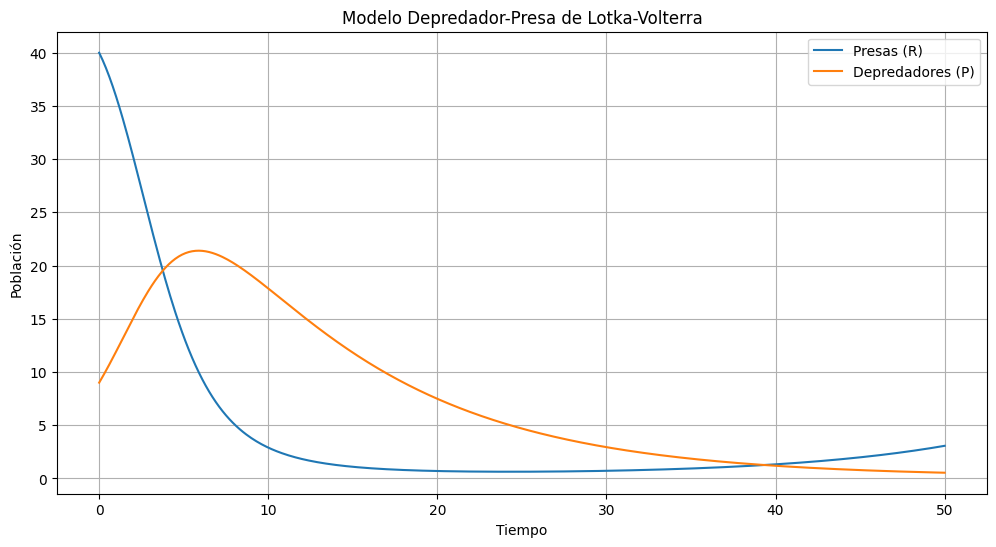

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(t, y[:, 0], label='Presas (R)')
plt.plot(t, y[:, 1], label='Depredadores (P)')
plt.title('Modelo Depredador-Presa de Lotka-Volterra')
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.legend()
plt.grid(True)
plt.show()

### Gráfica de fase

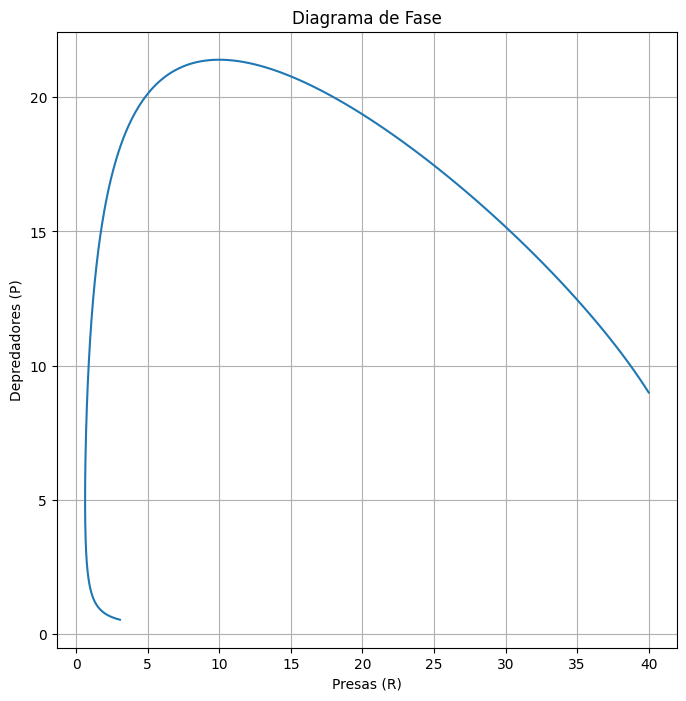

In [10]:
plt.figure(figsize=(8, 8))
plt.plot(y[:, 0], y[:, 1])
plt.title('Diagrama de Fase')
plt.xlabel('Presas (R)')
plt.ylabel('Depredadores (P)')
plt.grid(True)
plt.show()